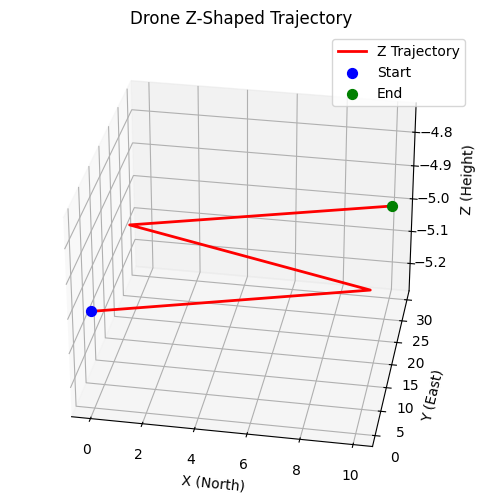

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# read CSV file
csv_filename = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/zigzag_shape/z_trajectory.csv"
df = pd.read_csv(csv_filename)

px = df["px"]
py = df["py"]
pz = df["pz"]

# create 3D pic
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# plot Z path
ax.plot(px, py, pz, color="red", linewidth=2, label="Z Trajectory")

# set the start and end point
ax.scatter(px.iloc[0], py.iloc[0], pz.iloc[0], color="blue", s=50, label="Start")
ax.scatter(px.iloc[-1], py.iloc[-1], pz.iloc[-1], color="green", s=50, label="End")


# ax.zaxis.set_rotate_label(False) 
# set labels and title
ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Height)",labelpad=10) 
ax.set_title("Drone Z-Shaped Trajectory")

ax.view_init(azim=280)  
# add the graph
ax.legend()

#plot the graph
plt.show()

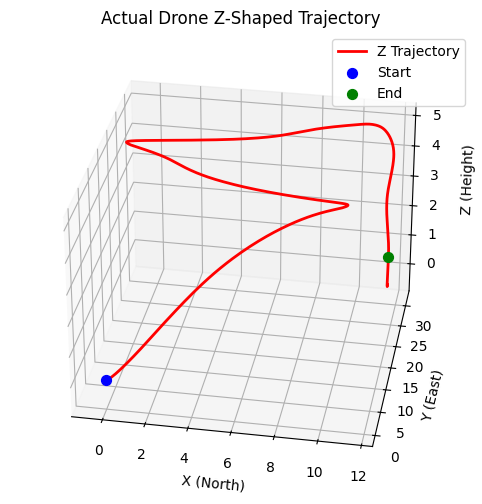

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# read CSV file
csv_filename = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/zigzag_shape/mavsdk_position_velocity.csv"
df = pd.read_csv(csv_filename)

px = df["north_m"]
py = df["east_m"]
pz = df["down_m"]

# create 3D pic
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# plot Z path
ax.plot(px, py, -pz, color="red", linewidth=2, label="Z Trajectory")

# set the start and end point
ax.scatter(px.iloc[0], py.iloc[0], pz.iloc[0], color="blue", s=50, label="Start")
ax.scatter(px.iloc[-1], py.iloc[-1], pz.iloc[-1], color="green", s=50, label="End")


# ax.zaxis.set_rotate_label(False) 
# set labels and title
ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Height)",labelpad=10) 
ax.set_title("Actual Drone Z-Shaped Trajectory")

ax.view_init(azim=280)  
# add the graph
ax.legend()

#plot the graph
plt.show()

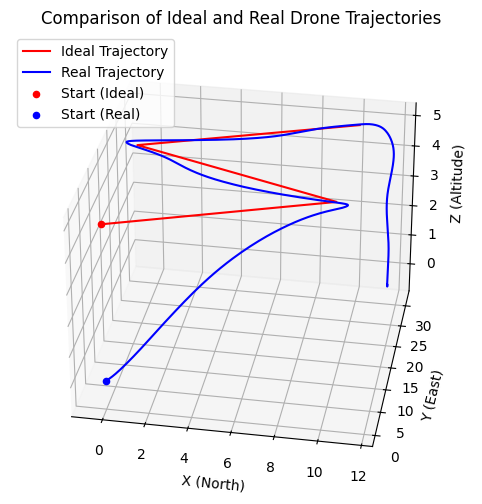

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 读取理论轨迹（输入 CSV）
ideal_traj = pd.read_csv("z_trajectory.csv")
# 读取仿真反馈轨迹（MAVSDK 记录）
real_traj = pd.read_csv("mavsdk_position_velocity.csv")

# 创建 3D 轨迹图
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# 绘制理想轨迹
ax.plot(ideal_traj["px"], ideal_traj["py"], -ideal_traj["pz"], 'r', label="Ideal Trajectory")
# 绘制真实轨迹
ax.plot(real_traj["north_m"], real_traj["east_m"], -real_traj["down_m"], 'b', label="Real Trajectory")

# 标记起点和终点
ax.scatter(ideal_traj["px"][0], ideal_traj["py"][0], -ideal_traj["pz"][0], color="red", marker="o", label="Start (Ideal)")
ax.scatter(real_traj["north_m"][0], real_traj["east_m"][0], -real_traj["down_m"][0], color="blue", marker="o", label="Start (Real)")

# 轴标签
ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Altitude)")
ax.set_title("Comparison of Ideal and Real Drone Trajectories")
ax.legend()
ax.grid(True)
ax.view_init(azim=280)  
# add the graph
ax.legend()
# 显示图像
plt.show()


In [12]:
import numpy as np

# 计算误差
error_x = ideal_traj["px"] - real_traj["north_m"]
error_y = ideal_traj["py"] - real_traj["east_m"]
error_z = ideal_traj["pz"] - (-real_traj["down_m"])

# 计算 RMSE
rmse_x = np.sqrt(np.mean(error_x ** 2))
rmse_y = np.sqrt(np.mean(error_y ** 2))
rmse_z = np.sqrt(np.mean(error_z ** 2))

print(f"RMSE X: {rmse_x:.3f} m, RMSE Y: {rmse_y:.3f} m, RMSE Z: {rmse_z:.3f} m")


RMSE X: 5.036 m, RMSE Y: 16.144 m, RMSE Z: 5.601 m


In [13]:
max_error_x = np.max(np.abs(error_x))
max_error_y = np.max(np.abs(error_y))
max_error_z = np.max(np.abs(error_z))

print(f"Max Error X: {max_error_x:.3f} m, Max Error Y: {max_error_y:.3f} m, Max Error Z: {max_error_z:.3f} m")


Max Error X: 10.005 m, Max Error Y: 24.829 m, Max Error Z: 8.432 m


In [26]:
import numpy as np
import pandas as pd

# 读取数据
ideal_traj = pd.read_csv("z_trajectory.csv")
real_traj = pd.read_csv("mavsdk_position_velocity.csv")

# 确保时间戳匹配（插值对齐）
ideal_time = ideal_traj["t"]
real_time = np.linspace(ideal_time.min(), ideal_time.max(), len(real_traj))

# 对 `real_traj` 进行插值，使其匹配 `ideal_traj`
interp_x = np.interp(ideal_time, real_time, real_traj["north_m"])
interp_y = np.interp(ideal_time, real_time, real_traj["east_m"])
interp_z = np.interp(ideal_time, real_time, -real_traj["down_m"])

# 计算误差
error_x = ideal_traj["px"] - interp_x
error_y = ideal_traj["py"] - interp_y
error_z = ideal_traj["pz"] - interp_z

# 计算误差百分比
error_x_pct = np.where(ideal_traj["px"] != 0, (error_x / ideal_traj["px"]), 0)
error_y_pct = np.where(ideal_traj["py"] != 0, (error_y / ideal_traj["py"]), 0)
error_z_pct = np.where(ideal_traj["pz"] != 0, (error_z / ideal_traj["pz"]), 0)

# 计算平均误差百分比
mean_error_x_pct = np.mean(np.abs(error_x_pct))
mean_error_y_pct = np.mean(np.abs(error_y_pct))
mean_error_z_pct = np.mean(np.abs(error_z_pct))

# 计算最大误差百分比
max_error_x_pct = np.max(np.abs(error_x_pct))
max_error_y_pct = np.max(np.abs(error_y_pct))
max_error_z_pct = np.max(np.abs(error_z_pct))

# 组织误差百分比数据
error_percentage_results = {
    "Mean Error %": {
        "X (North)": mean_error_x_pct,
        "Y (East)": mean_error_y_pct,
        "Z (Altitude)": mean_error_z_pct,
    },
    "Max Error %": {
        "X (North)": max_error_x_pct,
        "Y (East)": max_error_y_pct,
        "Z (Altitude)": max_error_z_pct,
    },
}
error_percentage_df = pd.DataFrame(error_percentage_results)
print(error_percentage_df)

              Mean Error %  Max Error %
X (North)         2.632375    54.075370
Y (East)          0.474550     1.098357
Z (Altitude)      1.610873     2.000784
